## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Uploading Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aerofit_treadmill.txt to aerofit_treadmill.txt


## 1 - Exploratory Data Analysis -
	==> shape, dtypes etc.
	==> NA values
	==> categorization
	==> observations

In [ ]:
df = pd.read_csv("aerofit_treadmill.txt")

# **Checking for duplicate rows**

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

# **Deleting duplicate rows**

In [ ]:
df = df.drop_duplicates()
np.any(df.duplicated())

False

# **Missing value**

In [ ]:
df.isna().head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
# checking first 5 rows
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
df.shape

(180, 9)

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 14.1+ KB


Observations:

Product, Gender, Martital Status are objects.
All other variables are numerical and their datatype (int64) aligns, even Fitness - since it is a numerical value on a scale I'd like to keep the datatype as is.
Variable datatypes match their description (i.e. Education being numerical to represent the no. of years the customer has).

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Observations:

The means for age, usage, fitness, income, and miles land between the 50% and 75% percentiles of the data, which could imply that those variables skew right of the distribution to varying degrees.
However, the ranges across the variables are quite wide. The max values across age, usage, fitness, income depart significantly from the 75% percentile mark which also implies the presence of a lot of outliers to the right of the distribution.
The means for these variables are therefore most likely pulled up due to the influence of these high outliers. Their distributions most likely skew to the left instead, seeing how the IQR is much closer to the min values than to the max. This means this dataset is skewed relatively younger, lower-income and lower-milage (i.e. these customers are not running marathons on these products).

In [ ]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


## **Categorisation of the data**

In [ ]:
def filter(x):
    if x <= 40000:
        return 'low'
    if (x > 40000 and x <= 80000):
        return 'medium'
    if x > 80000:
        return 'high'
#applying the filter function to 'Salary' column
df['Income_category'] = df['Income'].apply(filter)

In [ ]:
def filter2(x):
    if x <= 24:
        return 'young'
    if (x > 24 and x <= 30):
        return 'middle'
    if x > 30:
        return 'aged'
#applying the filter function to 'Salary' column
df['Age_category'] = df['Age'].apply(filter2)

In [ ]:
def filter3(x):
    if x <= 80:
        return 'less_miles'
    if (x > 80 and x <= 100):
        return 'med_miles'
    if x > 100:
        return 'high_miles'
#applying the filter function to 'Salary' column
df['Miles_category'] = df['Miles'].apply(filter3)

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,category,Age_category,Miles_category,Income_category
0,KP281,18,Male,14,Single,3,4,29562,112,low,young,high_miles,low
1,KP281,19,Male,15,Single,2,3,31836,75,low,young,less_miles,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,low,young,less_miles,low
3,KP281,19,Male,12,Single,3,3,32973,85,low,young,med_miles,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,low,young,less_miles,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,high,aged,high_miles,high
176,KP781,42,Male,18,Single,5,4,89641,200,high,aged,high_miles,high
177,KP781,45,Male,16,Single,5,5,90886,160,high,aged,high_miles,high
178,KP781,47,Male,18,Partnered,4,5,104581,120,high,aged,high_miles,high


In [ ]:
df.sort_values(by="Age").head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,category,Age_category,Miles_category
0,KP281,18,Male,14,Single,3,4,29562,112,low,young,high_miles
3,KP281,19,Male,12,Single,3,3,32973,85,low,young,med_miles
80,KP481,19,Male,14,Single,3,3,31836,64,low,young,less_miles
1,KP281,19,Male,15,Single,2,3,31836,75,low,young,less_miles
2,KP281,19,Female,14,Partnered,4,3,30699,66,low,young,less_miles


shape of data

# 2. Missing value & Non-Graphical Analysis: Value counts and unique **attributes**

In [ ]:
df.isna().sum()

Product            0
Age                0
Gender             0
Education          0
MaritalStatus      0
Usage              0
Fitness            0
Income             0
Miles              0
category           0
Age_category       0
Miles_category     0
Income_category    0
dtype: int64

No null values present in the data

In [ ]:
df["Age"].nunique()

32

In [ ]:
pd.value_counts(df["Age"])

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [ ]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
df["Product"].nunique()

3

In [ ]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df["Usage"].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
df["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [ ]:
df["Income_category"].value_counts()

medium    129
low        32
high       19
Name: Income_category, dtype: int64

In [ ]:
df["Age_category"].value_counts()

middle    66
aged      60
young     54
Name: Age_category, dtype: int64

In [ ]:
pd.value_counts(df.Usage,normalize=True)


3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

In [ ]:
pd.value_counts(df.Gender,normalize=True)


Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [ ]:
pd.value_counts(df.Product,normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

## 3 - Visual Analysis -

# **3.1 Univariate  and observations**

# **For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

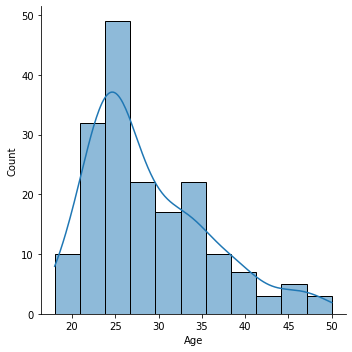

In [ ]:
sns.displot(df["Age"],kde=True)

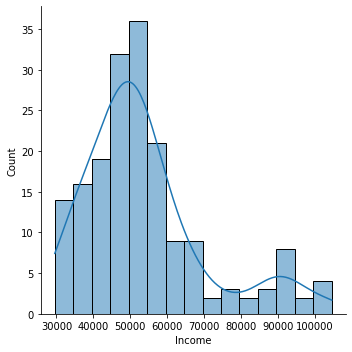

In [ ]:
sns.displot(df["Income"],kde=True)

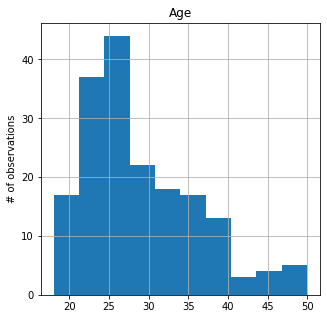

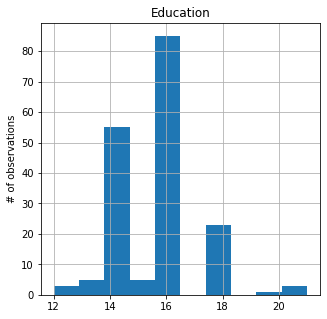

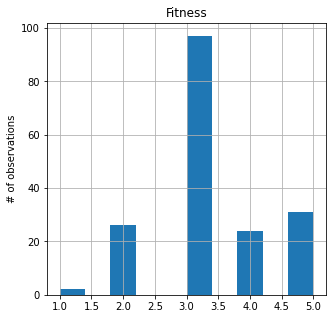

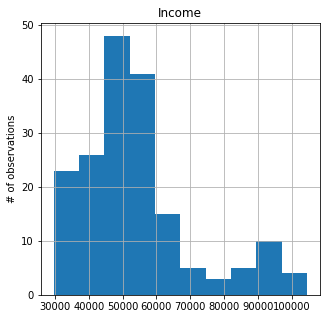

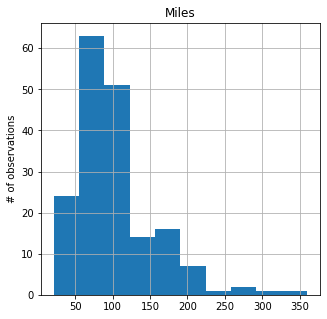

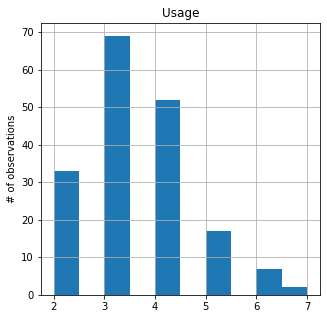

In [ ]:
for var1 in ["Age", "Education","Fitness","Income",  "Miles", "Usage" ]:
    df[var1].hist(figsize= (5,5))
    plt.ylabel("# of observations")
    plt.title(var1)
    plt.show()

For categorical variable(s): Boxplot

<AxesSubplot:xlabel='Miles', ylabel='Count'>

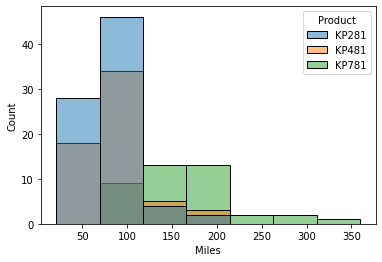

In [ ]:
sns.histplot(data=df,x="Miles",hue="Product",bins=7)

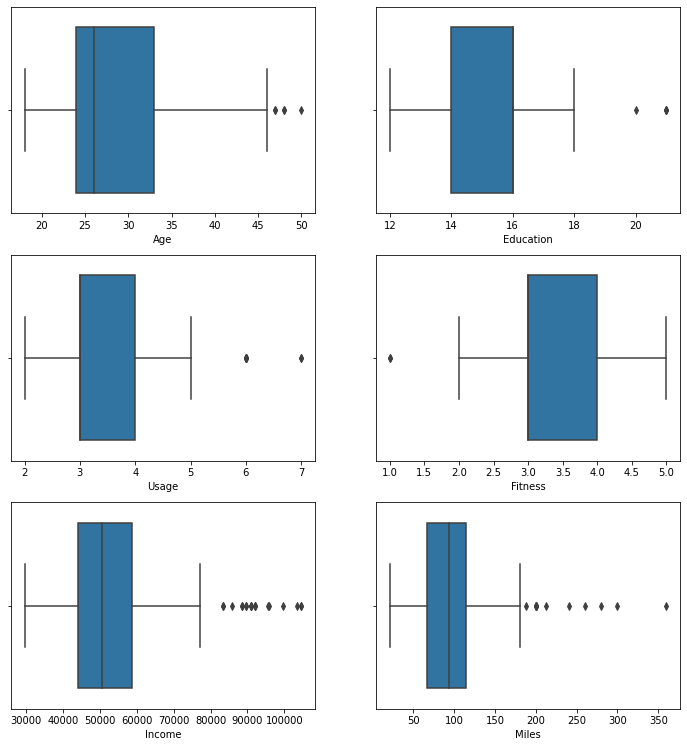

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.1)
sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

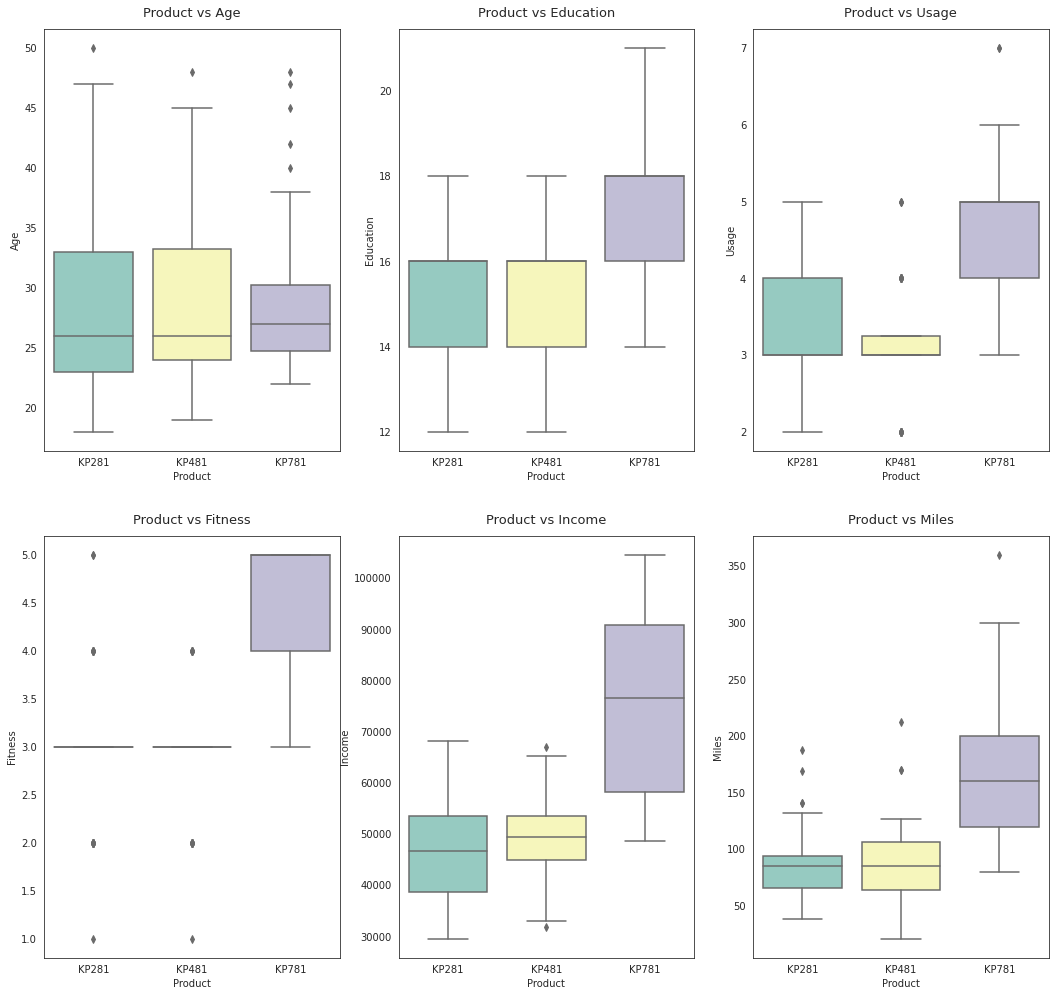

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
  for j in range(3):
    sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
    axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
    count += 1

**Observations:-**
Product vs Age:-
Customers purchasing products KP281 & KP481 are having same Age median value.
Customers whose age lies between 25-30, are more likely to buy KP781 product


**Product vs Education:-**
Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
While the customers with Education less than 16 have equal chances of purchasing KP281 or
KP481.

**Product vs Usage:-**
Customers who are planning to use the treadmill greater than 4 times a week, are more likely
to purchase the KP781 product.
While the other customers are likely to purchasing KP281 or KP481.


**Product vs Fitness:-**
The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase
the KP781 product.


**Product vs Income:-**
Higher the Income of the customer (Income >= 60000), higher the chances of the customer to
purchase the KP781 product.


**Product vs Miles:-**
If the customer expects to walk/run greater than 120 Miles per week, it is more likely that
the customer will buy KP781 product.

While Income and Miles are having more outliers than Age,education,usage ,fitness

## **3.2 Bivariate analysis**

Text(0.5, 1.0, 'The Relationship between Age and Gender of Consumers')

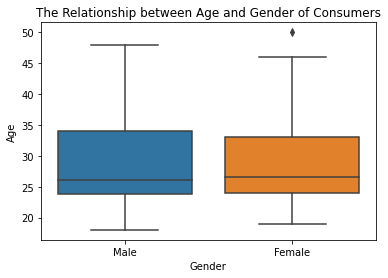

In [ ]:
A = sns.boxplot(x="Gender", y="Age", data=df)
A.set_title("The Relationship between Age and Gender of Consumers")

# #Boxplot for Products and the Income of customers purchasing those **products**

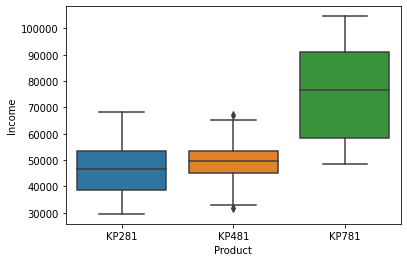

In [ ]:

sns.boxplot(data=df, x = 'Product', y = 'Income')
plt.show()

# **4. Outlier detection** Detecting Outliers (using boxplot by checking the difference between mean and median)

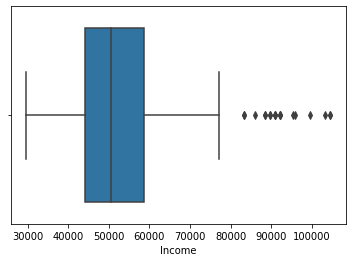

In [ ]:
#Boxplot for Income of customers purchasing products before outlier removal
sns.boxplot(data=df, x = 'Income')
plt.show()

In [ ]:
df['Income'].mean()

53719.57777777778

#I have used shallow copy of our dataframe for storing it's modified version after removing outliers

In [ ]:

q1=df['Income'].quantile(.25)
q2=df['Income'].median()
q3=df['Income'].quantile(.75)
iqr=q3-q1
df_scopy=df[(df['Income']>q1-1.5*iqr)&(df['Income']<q3+1.5*iqr)]
df_scopy.shape

(161, 9)

In [ ]:
df.shape

(180, 9)

#Boxplot for Income of customers purchasing products after outlier removal

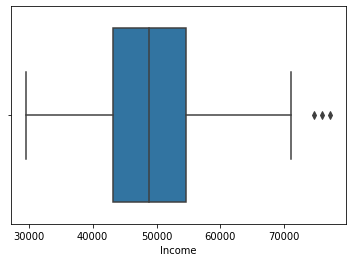

In [ ]:

sns.boxplot(data=df_scopy, x = 'Income')
plt.show()

#Boxplot for Gender and the Income of customers purchasing products before outlier removal

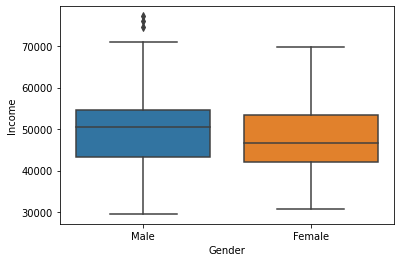

In [ ]:

sns.boxplot(data=df_scopy, x = 'Gender', y = 'Income')
plt.show()

 # Mean before outlier removal

In [ ]:
df.groupby('Gender')['Income'].mean()

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

#Boxplot for Gender and the Income of customers purchasing products after outlier removal

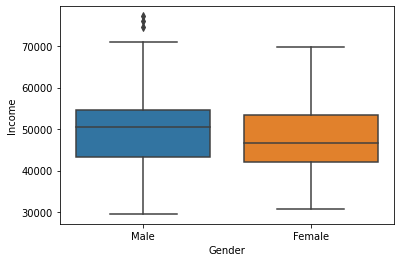

In [ ]:

sns.boxplot(data=df_scopy, x = 'Gender', y = 'Income')
plt.show()

# Mean before outlier removal

In [ ]:
df_scopy.groupby('Gender')['Income'].mean()

Gender
Female    48056.356164
Male      50000.840909
Name: Income, dtype: float64

Observations:

After outlier removal for income, 19 rows are deleted and in order to draw some insights from the original data in future, stored the modied data in it's shallow copy - df_scopy
In the boxplot, we can clearly see that most of the outliers are removed and the data is now ready for further analysis and inferences.

Observations :

KP781 Treadmill with advanced features is preffered by the customers with higher income.
KP281 Treadmill with the lowest cost and basic features is preffered by the customers with lower income and the KP481 product with moderate features are liked by the customers with upper bracket of low - moderate income group.
Inference :

There aren't any significant outliers for Products and the Income of customers purchasing those products. So no need for outlier removal here.
The target audience for KP781 Treadmill should be the higher income group. So the sales team must focus on this range.

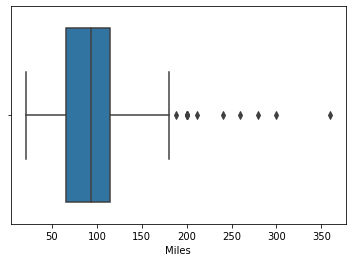

In [ ]:
df_scopy1 = df
sns.boxplot(data = df_scopy1, x = 'Miles')
plt.show()

#I have used shallow copy of our dataframe for storing it's modified version after removing outliers

In [ ]:

q1=df_scopy1['Miles'].quantile(.25)
q2=df_scopy1['Miles'].median()
q3=df_scopy1['Miles'].quantile(.75)
iqr=q3-q1
df_scopy1=df_scopy1[(df_scopy1['Miles']>q1-1.5*iqr)&(df_scopy1['Miles']<q3+1.5*iqr)]
df_scopy1.shape

(167, 9)

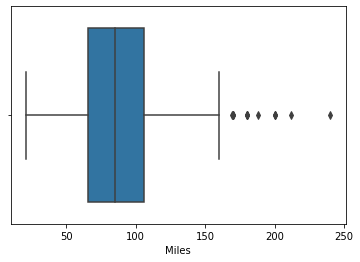

In [ ]:
sns.boxplot(data = df_scopy, x = 'Miles')
plt.show()

Observations:

After outlier removal for Miles, 13 rows are deleted and in order to draw some insights from the original data in future, stored the modied data in it's shallow copy - df_scopy1
In the boxplot, we can clearly see that most of the outliers are removed and the data is now ready for further analysis and inferences.
As of now we will be restricting drawing any insights from df_scopy1 and will be foxusing on df_scopy i.e DF obtained after handing outliers on Income column

Text(0.01, 0.5, ' # of Observations')

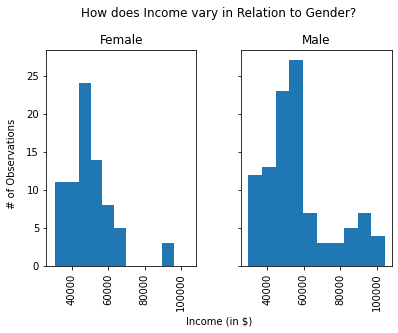

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)

df.hist(by='Gender',column = 'Income',ax=axes)
plt.suptitle("How does Income vary in Relation to Gender?", x=0.5, y=1.05, ha='center', fontsize='large')
fig.text(0.5, -0.05, 'Income (in $)', ha='center')
fig.text(0.01, 0.5, ' # of Observations', va='center', rotation='vertical')

In [ ]:
pd.crosstab(df["Product"], df["Gender"])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


# **3.3 For correlation: Heatmaps, Pairplots**

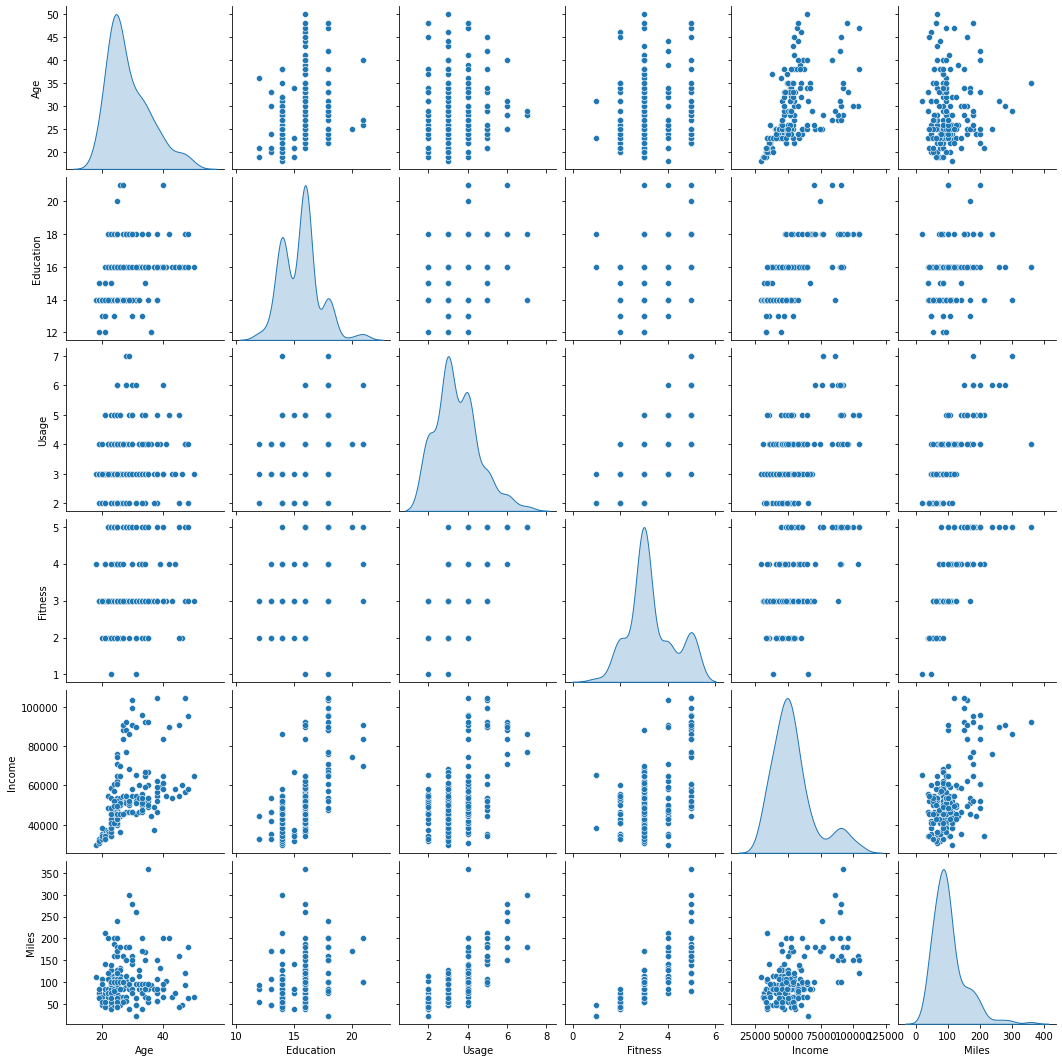

In [ ]:
sns.pairplot(df, diag_kind="kde");

In [ ]:
correlation = df.corr()
correlation

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


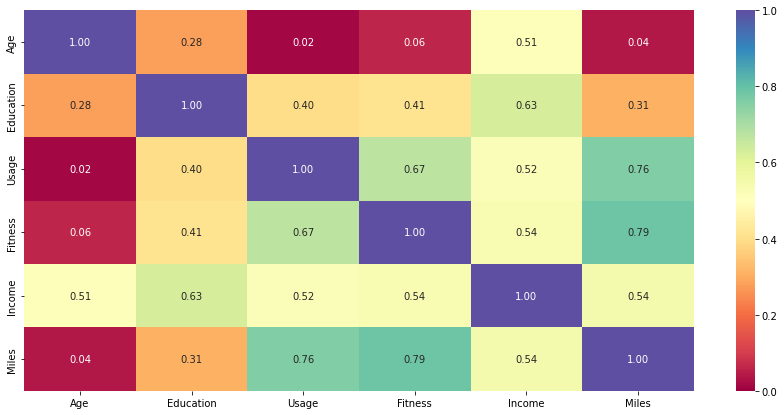

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=0, vmax=1, fmt=".2f", cmap="Spectral");

Observation:

Some interesting positive correlations are between income and usage, fitness and miles. This would be a great area for further investigation.
High correlations between usage, fitness and miles are to be expected since the variables are related (i.e. the more active an individual is, the more all three variables would be simultaneously higher) - however it is interesting that between the three, fitness has a slighly lower correlation. This could be due to the fact that people can be high-fitness individuals in different ways other than running.
Education's only strong correlation is with income, which makes sense. It seems to only have weak correlations (0.25-0.5) with the other variables.
Age appears to have insignificant relations to usage, fitness and miles

Males have a higher average income of 56562.76 USD with the highest income recorded being 104581.00 USD compared to the average income of female consumers being 49828.91 USD with the highest income being 95866.00 USD. In addition, the average usage for males on a scale from 1-5 is rated at 3.65 compared to the average usage for females at 3.18. This could possibly explain the significant difference in the purchase of the KP781 model. There is a moderate positive correltaion between income and usage. This could mean that consumers with a higher income tend to use the product more often.

# **5. Business Insights based on Non-Graphical and Visual Analysis**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


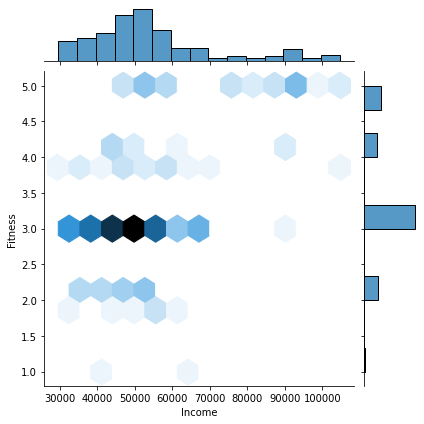

In [ ]:
sns.jointplot(df['Income'],df['Fitness'], kind='hex');

Observations: There seems to be a sweet spot where most customers are typically at a 3.0 fitness level, making around 40-60k

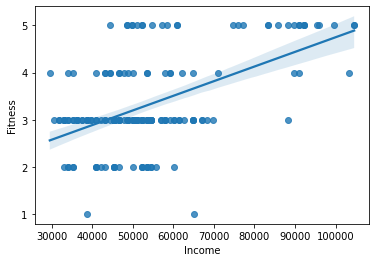

In [ ]:
sns.regplot(y="Fitness", x="Income", data=df);

Observation: This line plot reinforces the positive correlation between these two variables.

Looking at age to see if more light can be shed

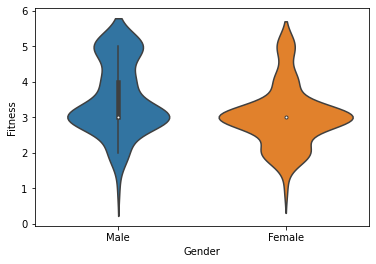

In [ ]:
sns.violinplot(x='Gender', y='Fitness', data=df);

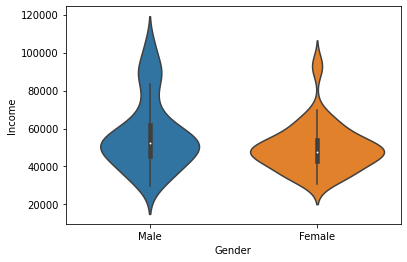

In [ ]:
sns.violinplot(x='Gender', y='Income', data=df);

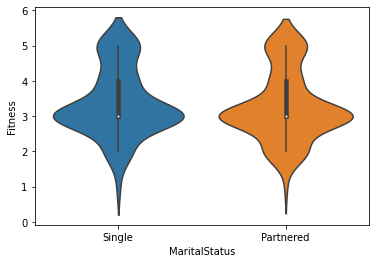

In [ ]:
sns.violinplot(x='MaritalStatus', y='Fitness', data=df);

<AxesSubplot:xlabel='MaritalStatus', ylabel='Income'>

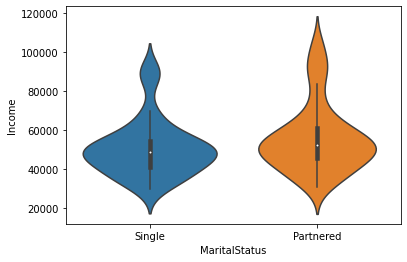

In [ ]:
sns.violinplot(x='MaritalStatus', y='Income', data=df)

Observations:

Something to keep in mind is that females' fitness levels appear to skew a bit downwards, and that their incomes show some concentration within a more narrow range than men.
Men, on the other hand, appear to skew up with their fitness levels, and show a greater income distribution.
Being partnered showes a greater income distribution thatn being single.
These observations will serve a great context when assessing these categorical values ffrom a product-centric view.

**Customer Profiling - Categorization of users.**

In [ ]:
print(df['Product'].unique())
print(df['Gender'].unique())
print(df['MaritalStatus'].unique())

['KP281' 'KP481' 'KP781']
['Male' 'Female']
['Single' 'Partnered']


<AxesSubplot:xlabel='Product', ylabel='count'>

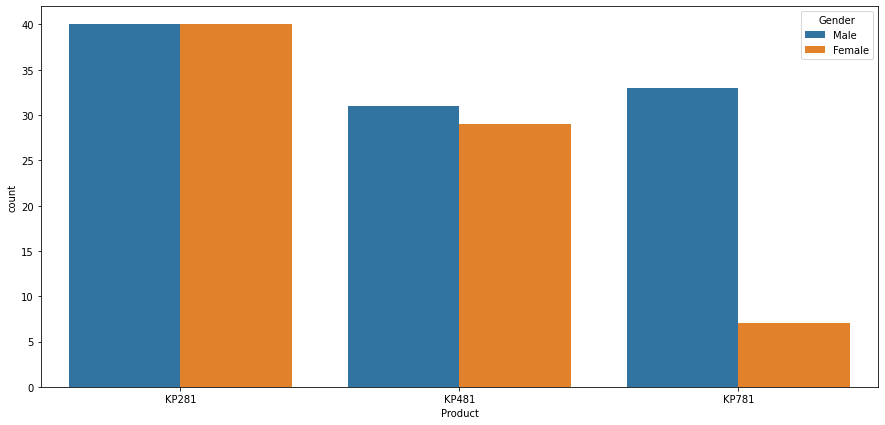

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x="Product",data=df,hue="Gender")

<AxesSubplot:xlabel='Product', ylabel='count'>

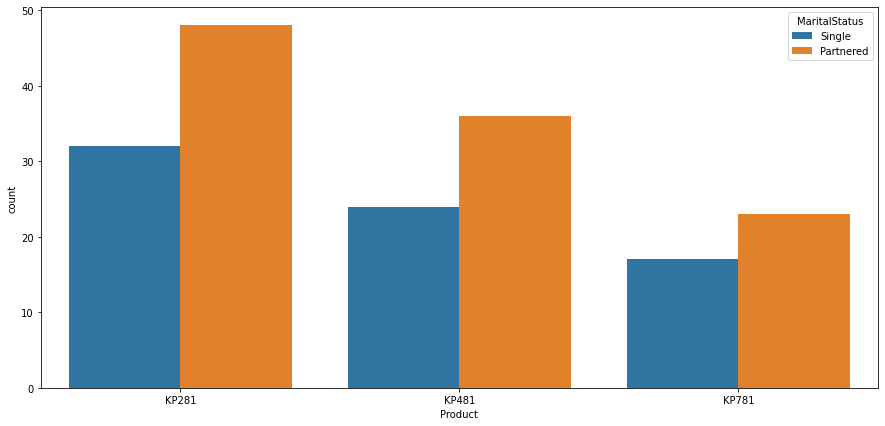

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x="Product",data=df,hue="MaritalStatus")

Observations:

KP281 appears to be the most popular product across both genders.
KP781 being the least frequently used product.
However, KP781 users are overwhelmingly male, which is interesting. Having the most eye-catching differentiators from the get-go, we can start to build a customer profile for this product.

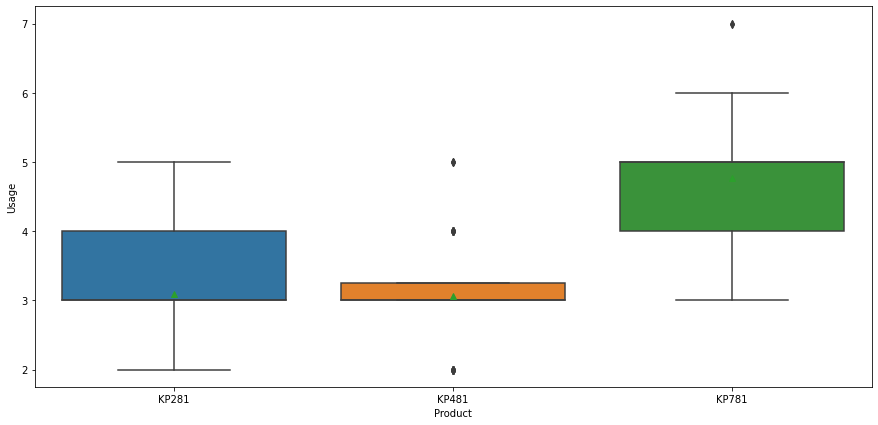

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Product',y='Usage', data=df, showmeans=True);

Observation:

KP781, the most popular product, cater to customers who typical use it 3-4 times a week (according to the IQR).
KP281, which is a product receiving mid popularity, tends to be used slighly less frequently (again, according to the IQR).
KP481, which is a lesser-used product attracting majority male customers, tends to be used at a higher frequency compared to the other products. How does this translate when looking at fitness?

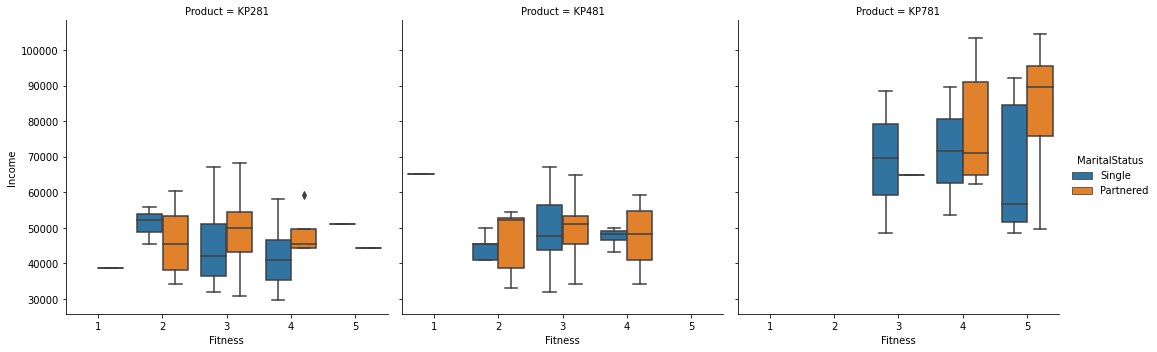

In [ ]:
sns.catplot(x='Fitness',
            y='Income',
            hue="MaritalStatus",
            col="Product",
            data=df,
            kind="box");

Observations:

KP781 customers are fit, more often men than women, and also have an income range that stretches higher (~50k-100k+), which matches an earlier observation we had that income and fitness have a positive relationship.

KP281 appears to be a mass-appeal product, with the highest number of overall customers and an equal distribution of male and female users.
KP481 sits in the middle of the three products, with not as many overall customers, but appealing to the some of the same types of consumers as those who buy KP281. We know that customers of this product tend to use it slighly less often per week.
KP281 and KP481 once again show similarity in that the majority of their customers are within similar income brackets (~35k-60k) and are about the same fitness level
Marital Status does not appear to affect product choice, though when looking at KP781, those who are partnered have higher fitness levels than those who are single

<AxesSubplot:xlabel='Income', ylabel='Age'>

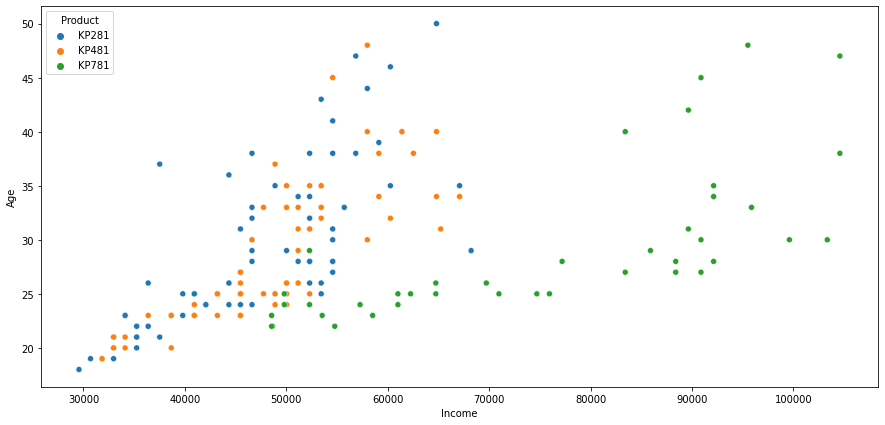

In [ ]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x="Income", y="Age", data=df, ci=None, hue='Product')

People with income more than 50000 only goes for KP781 product. People with lower and middle income will go for the other two products

<AxesSubplot:xlabel='Miles', ylabel='Age'>

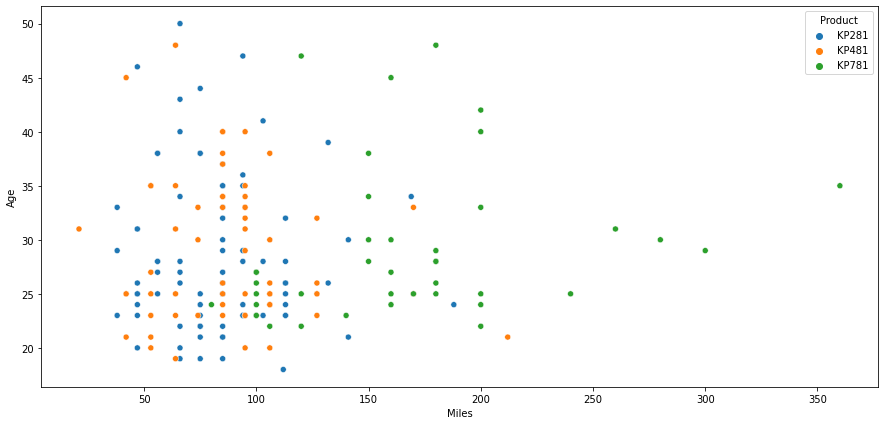

In [ ]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x="Miles", y="Age", data=df, ci=None, hue='Product')

People with less age and aiming for higher miles goes for the KP781 product. People with all categories of ages aiming for lower miles will go for the KP281 product

<AxesSubplot:xlabel='Age', ylabel='Education'>

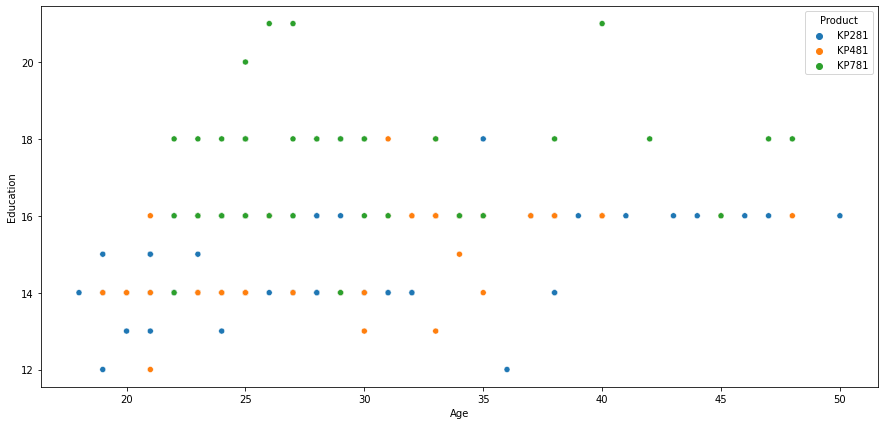

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="Age",y="Education",data=df,hue="Product")

Younger people with 16 and above years of education go for 'KP781' model and less people with 16 years of education tend to go for the other two models.

## **8. Probability- marginal, conditional probability.**

In [ ]:
len(df.Gender)

180

In [ ]:
dfm=df[df["Gender"]=="Male"]

In [ ]:
len(dfm)

104

In [ ]:
dff=df[df["Gender"]=="Female"]

In [ ]:
len(dff)

76

**Marginal Probability of being a Female Customer**

In [ ]:
len(dff)/len(df)

0.4222222222222222

**Marginal Probability of being a Male Customer**

In [ ]:
len(dfm)/len(df)

0.5777777777777777

In [ ]:
dfp281=df[df["Product"]=="KP281"]

In [ ]:
len(dfp281)

80

In [ ]:
dfp481=df[df["Product"]=="KP481"]

In [ ]:
len(dfp481)

60

In [ ]:
dfp781=df[df["Product"]=="KP781"]

In [ ]:
len(dfp781)

40

In [ ]:
df[["Product","Gender"]].value_counts()

Product  Gender
KP281    Female    40
         Male      40
KP781    Male      33
KP481    Male      31
         Female    29
KP781    Female     7
dtype: int64

In [ ]:
pd.crosstab(index=df["Product"],columns=df["Gender"],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


**Probability of Male and Product KP281**

In [ ]:
dfmp281=(df[(df["Product"]=="KP281") & (df["Gender"]=="Male")])

In [ ]:
len(dfmp281)

40

**Probability of buying product KP281 given its Male**

In [ ]:
len(dfmp281)/len(dfm)

0.38461538461538464

In [ ]:
dfmp481=(df[(df["Product"]=="KP481") & (df["Gender"]=="Male")])

In [ ]:
len(dfmp481)

31

**Probability of buying product KP481 given its Male**

In [ ]:
len(dfmp481)/len(dfm)

0.2980769230769231

In [ ]:
dfmp781=(df[(df["Product"]=="KP781") & (df["Gender"]=="Male")])

**Probability of buying product KP781 given its Male**

In [ ]:
len(dfmp781)

33

In [ ]:
len(dfmp781)/len(dfm)

0.3173076923076923

Given its a male KP281 has highest probability of getting purchased but all 3 probailities are almost similar. So each product has almost equal probability of getting pruchased

**Product vs Female probability analysis**

In [ ]:
dffp281=(df[(df["Product"]=="KP281") & (df["Gender"]=="Female")])

In [ ]:
len(dffp281)

40

**Probability of buying product KP281 given its Female**

In [ ]:
len(dffp281)/len(dff)

0.5263157894736842

In [ ]:
dffp481=(df[(df["Product"]=="KP481") & (df["Gender"]=="Female")])

In [ ]:
len(dffp481)

29

**Probability of buying product KP481 given its Female**

In [ ]:
len(dffp481)/len(dff)

0.3815789473684211

In [ ]:
dffp781=(df[(df["Product"]=="KP781") & (df["Gender"]=="Female")])

In [ ]:
len(dffp781)

7

**Probability of buying product KP781 given its Female**

In [ ]:
len(dffp781)/len(dff)

0.09210526315789473

***Given its a female customer product KP281 has highest probability of 50% getting purchased and product KP781 has least probability of 9%***

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,category
0,KP281,18,Male,14,Single,3,4,29562,112,low
1,KP281,19,Male,15,Single,2,3,31836,75,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,low
3,KP281,19,Male,12,Single,3,3,32973,85,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,low
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,high
176,KP781,42,Male,18,Single,5,4,89641,200,high
177,KP781,45,Male,16,Single,5,5,90886,160,high
178,KP781,47,Male,18,Partnered,4,5,104581,120,high


In [ ]:
pd.crosstab(index=df["Product"],columns=df["category"],margins=True)

category,high,low,medium,All
Product,,,,
KP281,0,23,57,80
KP481,0,9,51,60
KP781,19,0,21,40
All,19,32,129,180


In [ ]:
dfkp281=df[df["Product"]=="KP281"]

**Marginal probability of purchasing KP281**

In [ ]:
len(dfkp281)/len(df["Product"])

0.4444444444444444

**Marginal probability of purchasing KP481**

In [ ]:
dfkp481=df[df["Product"]=="KP481"]

In [ ]:
len(dfkp481)/len(df["Product"])

0.2222222222222222

In [ ]:
dfkp781=df[df["Product"]=="KP781"]

**Marginal probability of purchasing KP781 product**

In [ ]:
len(dfkp781)/len(df["Product"])

0.2222222222222222

Observations:


*   Product KP281 has highest probabaility of getting purchased
*   Product KP481,KP781 has equal probabilities of getting purchased




**Conditional Probabilitiy Analysis**

In [ ]:
dfhp281=(df[(df["Product"]=="KP281") & (df["category"]=="high")])

In [ ]:
len(dfhp281)

0

In [ ]:
dfch=df[df["category"]=="high"]

In [ ]:
len(dfch)

19

**Probability of user buying product KP281 given its high income user**

In [ ]:
len(dfhp281)/len(dfch)

0.0

In [ ]:
dfcm=df[df["category"]=="medium"]

In [ ]:
len(dfcm)

129

In [ ]:
dfcl=df[df["category"]=="low"]

In [ ]:
len(dfcl)

32

In [ ]:
dfmp281=(df[(df["Product"]=="KP281") & (df["category"]=="medium")])

In [ ]:
len(dfmp281)

57

**Probability of user buying product KP281 given its medium income user**

In [ ]:
len(dfmp281)/len(dfcm)

0.4418604651162791

In [ ]:
dflp281=(df[(df["Product"]=="KP281") & (df["category"]=="low")])

**Probability of user buying product KP281 given its low income user**

In [ ]:
len(dflp281)/len(dfcl)

0.71875

**Probability of user buying product KP481 given its high income user**

In [ ]:
dfhp481=(df[(df["Product"]=="KP481") & (df["category"]=="high")])

In [ ]:
len(dfhp481)/len(dfch)

0.0

**Probability of user buying product KP481 given its medium income user**

In [ ]:
dfmp481=(df[(df["Product"]=="KP481") & (df["income_category"]=="medium")])

In [ ]:
len(dfmp481)/len(dfcm)

0.3953488372093023

**Probability of user buying product KP481 given its low income user**

In [ ]:
dflp481=(df[(df["Product"]=="KP481") & (df["income_category"]=="low")])

In [ ]:
len(dflp481)/len(dfcl)

0.28125

**Probability of user buying product KP781 given its high income user**

In [ ]:
dfhp781=(df[(df["Product"]=="KP781") & (df["income_category"]=="high")])

In [ ]:
len(dfhp781)/len(dfch)

0.14728682170542637

**Probability of user buying product KP781 given its medium income user**

In [ ]:
dfmp781=(df[(df["Product"]=="KP781") & (df["income_category"]=="medium")])

In [ ]:
len(dfmp781)/len(dfcm)

0.16279069767441862

**Probability of user buying product KP781 given its low income user**

In [ ]:
dfmp781=(df[(df["Product"]=="KP781") & (df["income_category"]=="low")])

In [ ]:
len(dfmp781)/len(dfcm)

0.0

Observations:

Although initially age and education was not brought in due to its lack of relation to other key variables, it helps to illuminate further differences between the products.
KP481 shows a slighly denser distribution stretching upwards towards 40-year-olds and above, whereas the other two products and skewed younger.
The overall dataset is skewed relatively younger anyways, so taking that into account, the slightly older appeal apparent towards kp481 may be significant.
Customers of kp781 are also highly educated.

## **Customer segmentation:**

**KP281: ** For Low income, All fitness level people, Male & females, more usage, Both single and partnered, more miles.

**KP481:** For Medium income, fitness level people (1-4), Male & females, less usage, Both single and partnered,less to medium miles.

**KP781:** For Low income, fitness level people (3-5) , Male, more usage, Both single and partnered, more miles

## ***Business Insights***

Summary
Profiles:
Market Audience: Young to Middle-Aged Adults (Ages 20-40) for all models

TM195: Best Valued; Most affordable model. Motivating Cardio. Recommended for the average consumer, Sedentary to Moderate activity

TM498: Mid-grade model. Moderate to High Activity.

TM798:Luxury Grade Model; Full body workout with immersive technology, Recommended for fitness fanatics or seasoned runners, Consumers with Higher Income. Market toward young to middle-aged males with higher incomes

# **Actionable Insights**

Younger people with 16 and above years of education go for 'KP781' model and less people with 16 years of education tend to go for the other two models.

People with less age and aiming for higher miles goes for the KP781 product. People with all categories of ages aiming for lower miles will go for the KP281 product

KP781 customers are fit, more often men than women, and also have an income range that stretches higher (~50k-100k+), which matches an earlier observation we had that income and fitness have a positive relationship.

KP281 appears to be a mass-appeal product, with the highest number of overall customers and an equal distribution of male and female users.

KP481 sits in the middle of the three products, with not as many overall customers, but appealing to the some of the same types of consumers as those who buy KP281. We know that customers of this product tend to use it slighly less often per week.

KP281 and KP481 once again show similarity in that the majority of their customers are within similar income brackets (~35k-60k) and are about the same fitness level

Marital Status does not appear to affect product choice, though when looking at KP781, those who are partnered have higher fitness levels than those who are single

KP781 customers are fit, more often men than women, and also have an income range that stretches higher (~50k-100k+), which matches an earlier observation we had that income and fitness have a positive relationship.

KP281 appears to be a mass-appeal product, with the highest number of overall customers and an equal distribution of male and female users.

KP481 sits in the middle of the three products, with not as many overall customers, but appealing to the some of the same types of consumers as those who buy KP281. We know that customers of this product tend to use it slighly less often per week.

KP281 and KP481 once again show similarity in that the majority of their customers are within similar income brackets (~35k-60k) and are about the same fitness level

Marital Status does not appear to affect product choice, though when looking at KP781, those who are partnered have higher fitness levels than those who are single

# ***Recommendations***

1. KP281 is most frequent product and mass appealing product so always have it in the stock
2. Customer who is Partnered, is more likely to purchase the product. We need to do more survey why singles are not purchasing more
KP481 is tend to be purcahsed mostly by the medium income users. so if income between 40 to 80K they tend to go for KP481.
3. As per the data most of the customers are having 16 years of education and we need to enquiry why more than 16 education
peoples are not purchasing.
4. Males with higer income tend to buy KP781 treadmill than the females with higher income so availability of kp781 is advisable for male and higher income customers
5. People aimimg for more than 100 miles are going for KP781 only so finding the reason will boost the other model sales